DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2021-01-01", end="2023-12-01", freq='MS')  # Monthly Start
trend = np.linspace(10000, 25000, len(dates))
seasonality = 2000 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 1000, len(dates))

sales = trend + seasonality + noise

df = pd.DataFrame({
    'Month': dates,
    'Sales': np.round(sales, 2)
})
df.to_csv("monthly_sales_forecast.csv", index=False)


## Tasks:
1. Plot the sales trend

2. Apply:

    - 3-month Simple Moving Average
    - Exponential Smoothing (Single/Double if confident)

3. Forecast next 3 months (Jan–Mar 2024)

4. Compare MA vs ETS forecast visually

5. Interpret:

    - Which model fits better?
    - What decision can a business take using this forecast?

In [2]:
df.head()

,Month,Sales
0,2021-01-01,11496.71
1,2021-02-01,12022.36
2,2021-03-01,13504.83
3,2021-04-01,14540.79
4,2021-05-01,12480.13


In [3]:
df['month'] = df['Month'].dt.month
df

,Month,Sales,month
0,2021-01-01,11496.71,1
1,2021-02-01,12022.36,2
2,2021-03-01,13504.83,3
3,2021-04-01,14540.79,4
4,2021-05-01,12480.13,5
5,2021-06-01,11908.72,6
6,2021-07-01,13150.64,7
7,2021-08-01,12035.38,8
8,2021-09-01,10959.10,9
9,2021-10-01,12667.65,10


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

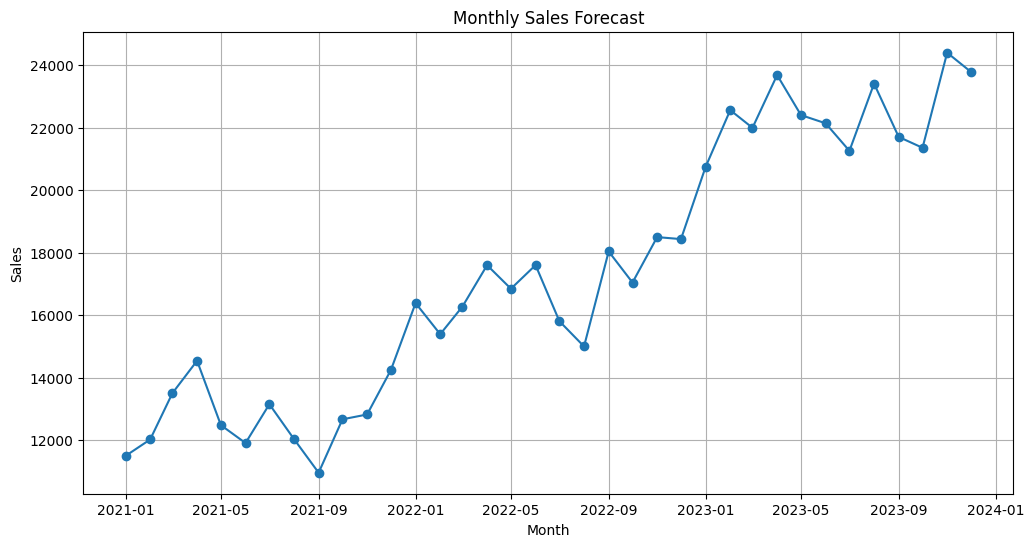

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title('Monthly Sales Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
df['SMA_3'] = df['Sales'].rolling(window=3).mean()

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

ses_model = SimpleExpSmoothing(df['Sales']).fit(smoothing_level=0.2, optimized=False)
df['SES'] = ses_model.fittedvalues

holt_model = ExponentialSmoothing(df['Sales'], trend='add', seasonal=None).fit()
df['Holt'] = holt_model.fittedvalues

In [8]:
# Forecast Next 3 Months

sma_forecast = [df['Sales'][-3:].mean()] * 3
ses_forecast = ses_model.forecast(3)
holt_forecast = holt_model.forecast(3)


In [10]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'SMA_forecast': sma_forecast,
    'SES_forecast': ses_forecast,
    'Holt_forecast': holt_forecast
}).reset_index(drop=True)

In [11]:
forecast_df

,SMA_forecast,SES_forecast,Holt_forecast
0,23175.41,22424.284241,24194.217752
1,23175.41,22424.284241,24538.929618
2,23175.41,22424.284241,24883.641485


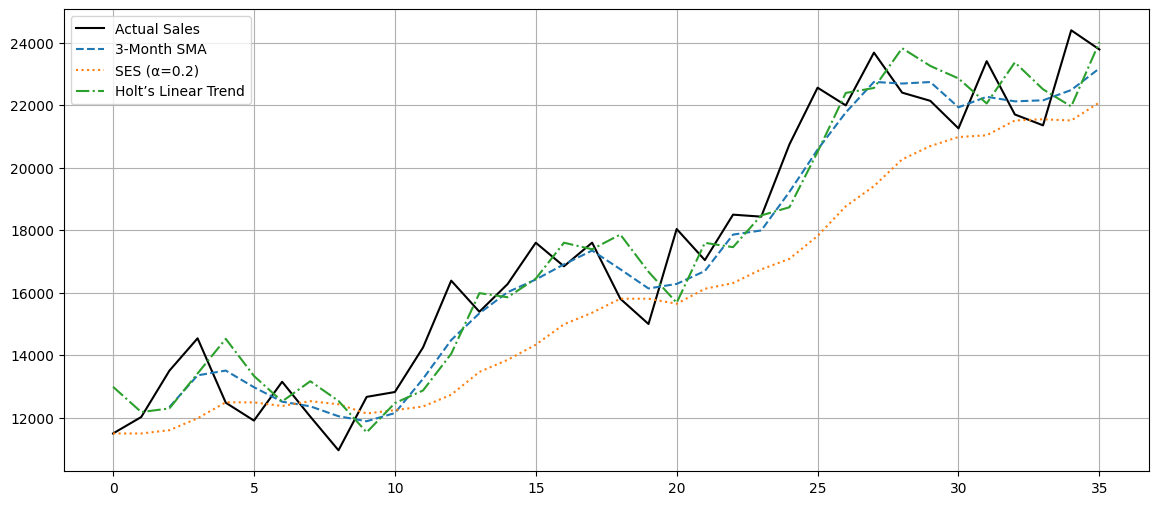

In [14]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Sales'], label='Actual Sales', color='black')
plt.plot(df.index, df['SMA_3'], label='3-Month SMA', linestyle='--')
plt.plot(df.index, df['SES'], label='SES (α=0.2)', linestyle=':')
plt.plot(df.index, df['Holt'], label='Holt’s Linear Trend', linestyle='-.')
plt.legend()
plt.grid(True)
plt.show()

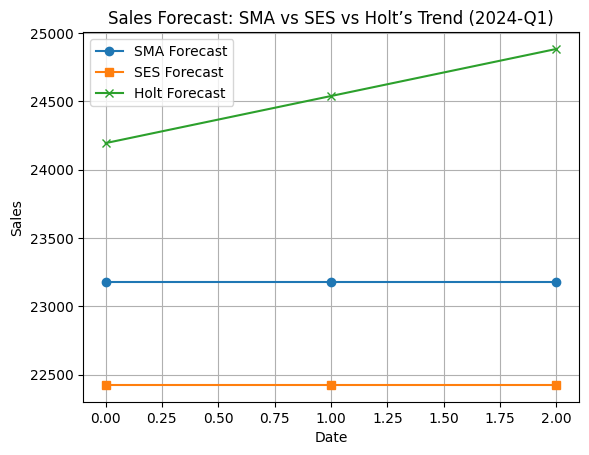

In [13]:
# Forecasts
plt.plot(forecast_df.index, forecast_df['SMA_forecast'], label='SMA Forecast', marker='o')
plt.plot(forecast_df.index, forecast_df['SES_forecast'], label='SES Forecast', marker='s')
plt.plot(forecast_df.index, forecast_df['Holt_forecast'], label='Holt Forecast', marker='x')

plt.title("Sales Forecast: SMA vs SES vs Holt’s Trend (2024-Q1)")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()